In [1]:
import torch, torch_geometric
from src import graphCA
from src.graphCNN import GraphCNN
import networkx as nx
from torch_geometric.nn import GCNConv

In [3]:
converter=graphCA.text_to_graph()
batches=converter(["Hello world! good i saw you", "How are you?"])
#out=text_to_seq(["Hello, y'all!", "How are you 😁 ?"])

NameError: name 'text_to_seq' is not defined

In [9]:
batches.get_example(1)

Data(x=[6], edge_index=[2, 25])

# simple graph example

NameError: name 'features' is not defined

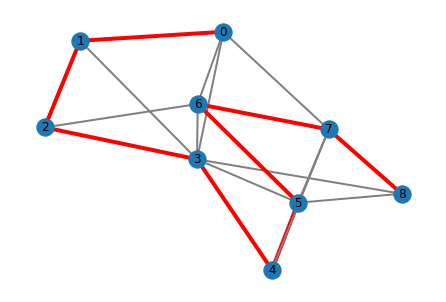

In [10]:
data=batches.get_example(0)
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

#update_f=GraphCNN(features)

In [126]:
type(data)

torch_geometric.data.data.Data

In [12]:
type(data)

torch_geometric.data.data.Data

In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [118]:
tokens=tokenizer(["Hello world! good i saw you", "How are you?"])
tokens

{'input_ids': [[101, 8667, 1362, 106, 1363, 178, 1486, 1128, 102], [101, 1731, 1132, 1128, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [119]:
tokens,mask=tokens['input_ids'],tokens['attention_mask']

ValueError: expected sequence of length 9 at dim 1 (got 6)

In [117]:
for i in range(len(tokens)):
    limit=sum(mask[i])
    tokens[i]=torch.tensor(tokens[i][:limit])
tokens

[tensor([ 101, 8667, 1362,  106, 1363,  178, 1486, 1128,  102]),
 tensor([ 101, 1731, 1132, 1128,  136,  102])]

In [64]:
a=torch.tensor([[1,2,6],[4,1,6]])
b=torch.tensor([[0,1,0],[1,0,1]]).bool()

a[0]=a[0,:-1]
#for i in range(a.shape[0]):
    #a[i]=a[i][b[i]]
a

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 0.  Target sizes: [3].  Tensor sizes: [2]

In [58]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [132]:
class text_to_graph():

    def __init__(self,
                tokenizer=AutoTokenizer.from_pretrained("bert-base-cased"),
                seq_to_graph=graphCA.sequence_to_random_graph):
                
        self.tokenizer=tokenizer
        self.seq_to_graph=seq_to_graph
    
    def __call__(self,text:list)->torch.Tensor:

        tokens=self.tokenizer(text)['input_ids']
        graphs= [self.seq_to_graph(torch.tensor(token)) for token in tokens]
        
        return torch_geometric.data.Batch.from_data_list(graphs)


In [149]:
batches.get_example(1)

Data(x=[6], edge_index=[2, 28])

In [23]:
out=text_to_seq(["Hello, y'all!", "How are you 😁 ?"])

TypeError: Tokenizer.encode_batch() got an unexpected keyword argument 'return_tensors'

In [20]:
torch.Tensor(out[0].ids)

TypeError: must be real number, not tokenizers.Encoding